In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing Dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison

In [4]:
# Establishing seed to ensure repeatability
np.random.seed(42)

# Choosing 25 observations random for the sample.
sample = data.sample(n=25)

In [5]:
# Determining the mean of the sample and highest glucose readings.

sample_mean_glucose = np.mean(sample['Glucose'])
sample_highest_glucose = np.max(sample['Glucose'])


In [6]:
# Determining the population mean glucose readings.
population_mean_glucose = np.mean(sample['Glucose'])
population_highest_glucose = np.max(sample['Glucose'])

In [7]:
# Showing the values of each

print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print("\nPopulation Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)

Sample Mean Glucose: 116.64
Sample Highest Glucose: 183

Population Mean Glucose: 116.64
Population Highest Glucose: 183


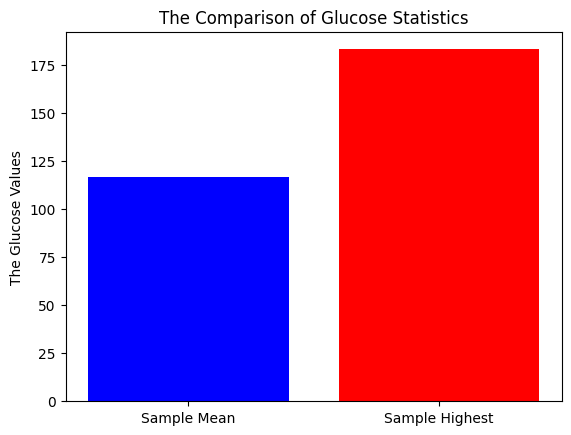

In [11]:
# Comparision

my_labels = ['Sample Mean', 'Sample Highest']
my_values = [sample_mean_glucose, sample_highest_glucose]

plt.bar(my_labels, my_values, color=['Blue', 'red'])
plt.title('The Comparison of Glucose Statistics')
plt.ylabel('The Glucose Values')
plt.show()


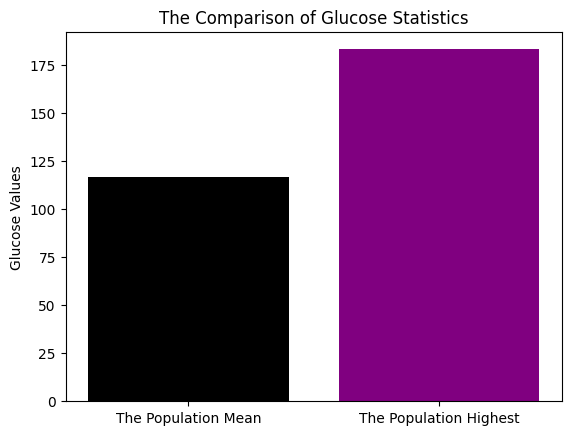

In [14]:

my_labels_1= ['The Population Mean', 'The Population Highest']
my_values_1= [population_mean_glucose, population_highest_glucose]
plt.bar(my_labels_1, my_values_1, color=['black', 'purple'])
plt.title('The Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

---



In [16]:
# Determining the sample's BMI's 98th percentile.
my_98th_percentile_sample_bmi = np.percentile(sample['BMI'], 98)

# Determining the population's 98th percentile for BMI.
my_98th_percentile_population_bmi = np.percentile(data['BMI'], 98)

# Displaying the percentiles of both
print("Sample 98th Percentile BMI:", my_98th_percentile_sample_bmi)
print("Population 98th Percentile BMI:", my_98th_percentile_population_bmi)

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


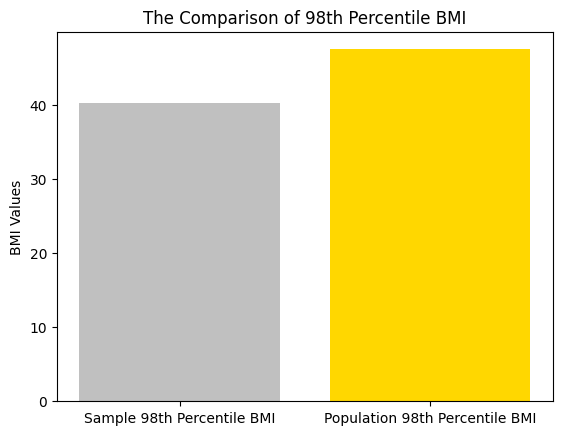

In [19]:
# Bar chart for comparison
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [my_98th_percentile_sample_bmi, my_98th_percentile_population_bmi]

plt.bar(labels, values, color=['silver', 'gold'])
plt.title('The Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

In [21]:
# Quantity and dimensions of each bootstrap sample

num_samples = 500
sample_size = 150

# Creating the empty arrays at first to hold bootstrap data.

bootstrap_means = [0] * num_samples
bootstrap_std_devs = [0] * num_samples
bootstrap_percentiles = [0] * num_samples

In [25]:
bootstrap_means = [np.mean(np.random.choice(data['BloodPressure'],
                                            size=sample_size, replace=True)) for _ in range(num_samples)]
bootstrap_std_devs = [np.std(np.random.choice(data['BloodPressure'],
                                              size=sample_size, replace=True)) for _ in range(num_samples)]
bootstrap_percentiles = [np.percentile(np.random.choice(data['BloodPressure'],
                                                        size=sample_size, replace=True), 92) for _ in range(num_samples)]


In [27]:
# Computing BloodPressure population statistics.
population_mean_bp, population_std_dev_bp, population_percentile_92_bp = data['BloodPressure'].mean(), data['BloodPressure'].std(), np.percentile(data['BloodPressure'], 92)


In [28]:
# Show the demographic data
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation BloodPressure:", population_std_dev_bp)
print("Population 92th Percentile BloodPressure:", population_percentile_92_bp)

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 92th Percentile BloodPressure: 88.0


In [29]:
# Determining the bootstrap statistics' mean, standard deviation, and 92th percentile.
bootstrap_mean_mean = np.mean([np.mean(sample) for sample in bootstrap_means])
bootstrap_mean_std_dev = np.mean([np.std(sample) for sample in bootstrap_std_devs])
bootstrap_mean_percentile_92 = np.mean([np.percentile(sample, 92) for sample in bootstrap_percentiles])


In [30]:
# Present the statistics from the bootstrap.
print("\nBootstrap Mean BloodPressure:", bootstrap_mean_mean)
print("Bootstrap Standard Deviation BloodPressure:", bootstrap_mean_std_dev)
print("Bootstrap 92th Percentile BloodPressure:", bootstrap_mean_percentile_92)


Bootstrap Mean BloodPressure: 69.07202666666666
Bootstrap Standard Deviation BloodPressure: 0.0
Bootstrap 92th Percentile BloodPressure: 88.45288000000002


In [31]:
print(f"Length of labels: {len(labels)}")
print(f"Length of values: {len(values)}")

Length of labels: 2
Length of values: 2


<Figure size 1600x1000 with 0 Axes>

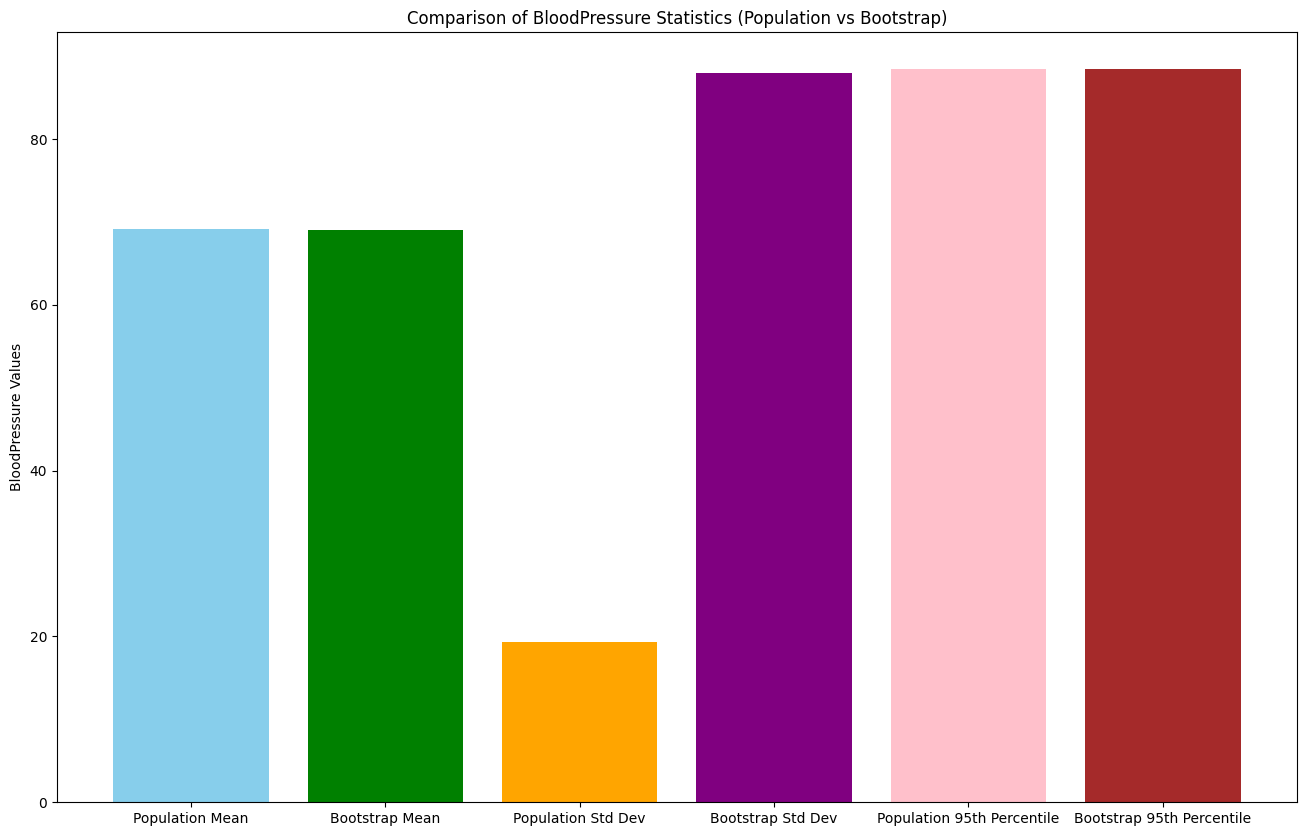

In [32]:
# Create a bar chart for comparison
plt.figure(figsize=(16, 10))
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 95th Percentile', 'Bootstrap 95th Percentile']
values = [population_mean_bp, bootstrap_mean_mean, population_std_dev_bp, population_percentile_92_bp,bootstrap_mean_percentile_92]

# Adjust the length of values to match labels
values.append(bootstrap_mean_percentile_92)

# Plot the bar chart
plt.figure(figsize=(16, 10))
plt.bar(labels, values, color=['skyblue', 'green', 'orange', 'purple', 'pink', 'brown'])
plt.title('Comparison of BloodPressure Statistics (Population vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()